## **Tugas Praktikum**
Buatlah sebuah model K-Means dengan ketentuan,

1. Gunakan data 'Mall_Customers.csv'

2. Tentukan fitur apa yang tepat untuk melakukan clustering (minimal 2)

3. Buatlah model K-Means dengan mempertimbangkan jumlah k yang terbaik.

4. Buatlah  implementasi model SOM untuk segmentasi citra lain

### 1. Menggunakan data 'Mall_Customers.csv'

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

df = pd.read_csv('data/Mall_Customers.csv')

df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


### 2. Menentukan fitur apa yang tepat untuk melakukan clustering (minimal 2)


In [2]:
df.drop(['CustomerID'], axis=1, inplace=True)
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


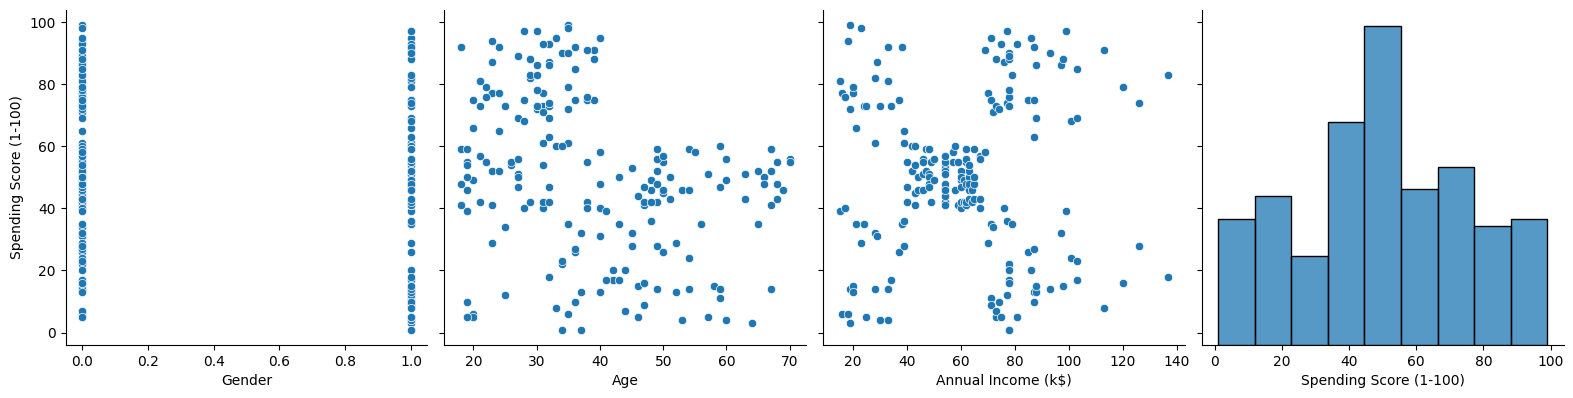

In [3]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])

sns.pairplot(df, x_vars=df.columns,
             y_vars=df.columns[-1], height=4, aspect=1, kind='scatter')

3. Buatlah model K-Means dengan mempertimbangkan jumlah k yang terbaik.


In [5]:
df_train = df[['Annual Income (k$)', 'Spending Score (1-100)']]
print(df_train)

     Annual Income (k$)  Spending Score (1-100)
0                    15                      39
1                    15                      81
2                    16                       6
3                    16                      77
4                    17                      40
..                  ...                     ...
195                 120                      79
196                 126                      28
197                 126                      74
198                 137                      18
199                 137                      83

[200 rows x 2 columns]


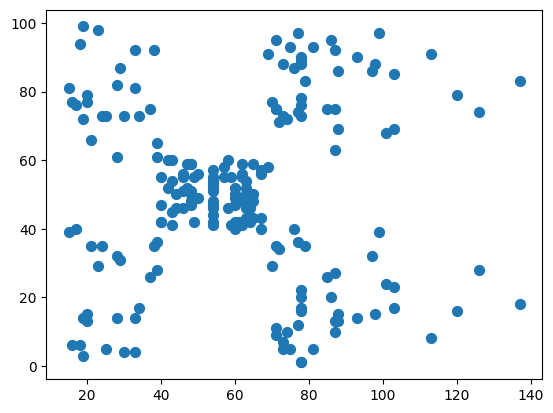

In [6]:
# Memplot Data
plt.scatter(df_train.iloc[:, 0], df_train.iloc[:, 1], s = 50)

In [8]:
# Inisiasi obyek KMeans
cl_kmeans = KMeans(n_clusters=2, n_init=10)

# Fit dan predict model
y_kmeans = cl_kmeans.fit_predict(df_train)

# Cek Nilai SSE
print(f'Nilai SSE: {cl_kmeans.inertia_}')

Nilai SSE: 182440.30762987013


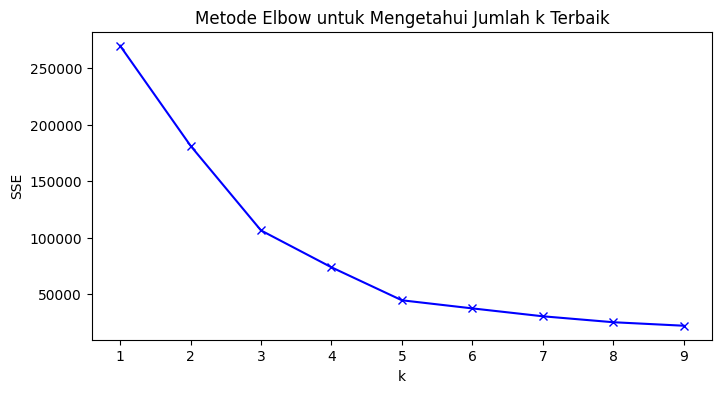

In [9]:
# Implementasi Metode Elbow

# List nilai SSE
sse = []

# Cari k terbaik dari 1-10
K = range(1,10)

# Cek nilai SSE setiap k
for k in K:
 kmeanModel = KMeans(n_clusters=k, n_init=10)
 kmeanModel.fit(df_train)
 sse.append(kmeanModel.inertia_)


# Plotting the distortions
plt.figure(figsize=(8,4))
plt.plot(K, sse, "bx-")
plt.xlabel("k")
plt.ylabel("SSE")
plt.title("Metode Elbow untuk Mengetahui Jumlah k Terbaik")
plt.show()

In [10]:
# Cek Nilai SSE setiap k
for idx, sse_val in enumerate(sse, start=1):
    print(f'k={idx}; SSE={sse_val}')

k=1; SSE=269981.28
k=2; SSE=181363.595959596
k=3; SSE=106348.37306211118
k=4; SSE=73679.78903948836
k=5; SSE=44448.45544793371
k=6; SSE=37265.86520484346
k=7; SSE=30273.394312070042
k=8; SSE=25012.917069885472
k=9; SSE=21913.929201194424


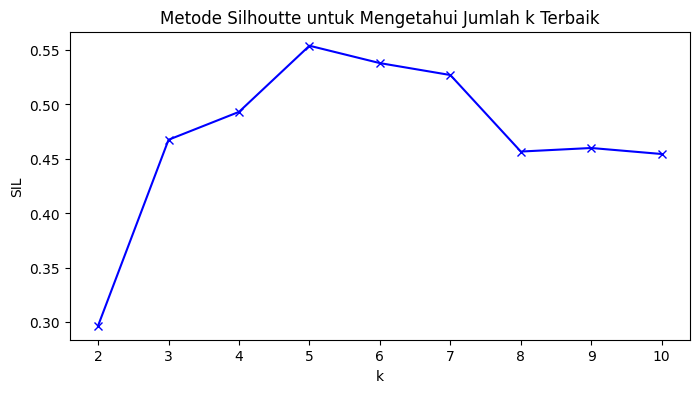

In [11]:
# Implementasi Metode Silhoutte
from sklearn.metrics import silhouette_score

# List nilai SIL
sil = []

# Cari k terbaik
kmax = 10
K = range(2, kmax+1)

# Cek nilai SSE setiap k
for k in K:
  kmeans = KMeans(n_clusters=k, n_init=10).fit(df_train)
  labels = kmeans.labels_
  sil.append(silhouette_score(df_train, labels, metric='euclidean'))

# Plotting the distortions
plt.figure(figsize=(8,4))
plt.plot(K, sil, "bx-")
plt.xlabel("k")
plt.ylabel("SIL")
plt.title("Metode Silhoutte untuk Mengetahui Jumlah k Terbaik")
plt.show()

In [12]:
# Buat Model KMeans

from sklearn.cluster import KMeans

# Inisiasi obyek KMeans
cl_kmeans = KMeans(n_clusters=5, n_init=10)

# Fit dan predict model
y_kmeans = cl_kmeans.fit_predict(df_train)

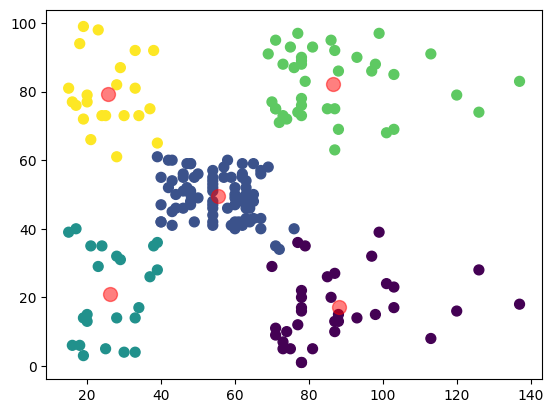

In [13]:
# Plot hasi cluster berdasarkan Sepal Length dan Sepal Width
plt.scatter(df_train.iloc[:, 0], df_train.iloc[:, 1], s = 50, c=y_kmeans)

# Plot centroid
centers = cl_kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=100, alpha=0.5)

4. Buatlah  implementasi model SOM untuk segmentasi citra lain

In [14]:
pip install minisom

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: minisom in c:\python312\lib\site-packages (2.3.3)




[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [15]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io

In [16]:
# Inisialisasi bobot SOM
def initilaize_weight (input_shape, output_shape):
    return np.random.rand(output_shape[0], output_shape[1], input_shape[2])

In [17]:
# Menghitung jarak antara vektor input dan bobot SOM
def calculate_distance(input_vector, weights):
    return np.linalg.norm(input_vector - weights, axis=2)

In [18]:
# Menemukan indeks unit pemenang (unit dengan bobot terdekat)
def find_winner_unit_in_image(input_vector, weights):
    distances = calculate_distance(input_vector, weights)
    return np.unravel_index(np.argmin(distances), distances.shape)

In [19]:
# Memperbarui bobot SOM
def update_weights(input_vector, weights, winner, learning_rate, neighborhood_radius):
    distances = np.linalg.norm(np.indices(
        weights.shape[:2]).T - np.array(winner).reshape(1, -1), axis=2)
    influence = np.exp(-distances / (2 * neighborhood_radius**2))
    weights += learning_rate * \
        influence[:, :, np.newaxis] * (input_vector - weights)

In [31]:
# Fungsi untuk melatih SOM
def train_som(image, num_epochs, initial_learning_rate, initial_neighborhood_radius):
    input_shape = image.shape
    som_shape = (10, 10, input_shape[2])  # Ukuran SOM sesuai dengan jumlah saluran warna
    weights = initilaize_weight(input_shape, som_shape)

    for epoch in range(num_epochs):
        # Update parameter pembelajaran dan radius tetangga
        learning_rate = initial_learning_rate * np.exp(-epoch / num_epochs)
        neighborhood_radius = initial_neighborhood_radius * np.exp(-epoch / num_epochs)
        # Pemrosesan SOM
        for i in range(input_shape[0]):
            for j in range(input_shape[1]):
                input_vector = image[i, j, :]
                winner = find_winner_unit_in_image(input_vector, weights)
                update_weights(input_vector, weights, winner, learning_rate, neighborhood_radius)

    return weights

In [32]:
# load citra
Sandra_path = 'img/cat.jpg'
Sandra = io.imread(Sandra_path) / 255.0

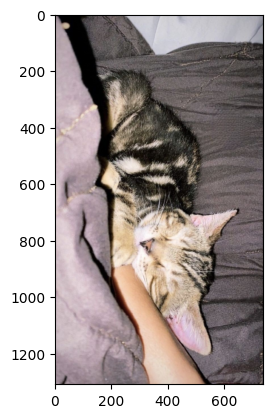

In [33]:
plt.imshow(Sandra)

In [34]:
# Latih SOM
num_epochs = 10
initial_learning_rate = 0.1
initial_neighborhood_radius = 1
trained_weights = train_som(Sandra, num_epochs, initial_learning_rate, initial_neighborhood_radius)

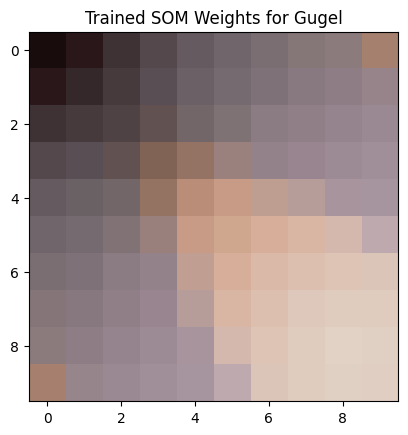

In [35]:
# Visualisasi bobot SOM
plt.imshow(trained_weights)
plt.title('Trained SOM Weights for Gugel')
plt.show()